## Project Applied Statistics - Winter 2024

Lecturer: Ian McLoughlin  
Author: Lais Coletta Pereira  

---

Project ask: Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

**1. Download and save the dataset to your repository.**

**2. Describe the data set in your notebook.**

**3. Describe what a t-test is, how it works, and what the assumptions are.**

**4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.**

**5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.**

**6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.**

---


Import necessary libraries

In [29]:
# Import libraries
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests
import scipy.stats as stats
from scipy.stats import levene

# Statistical modeling
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison


### **_1. Download and Load the Dataset_**

In [30]:
# URL of the dataset
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"

# Load the dataset from the URL
df = pd.read_csv(url)

# Define the path to save the dataset
path = "/Users/laiscoletta/Desktop/DA_Final_Semester/Applied-Statistics/plantgrowth.csv"

# Save the dataset as plantgrowth.csv in the 'Applied-Statistics' folder
df.to_csv(path, index=False)

### **_2. Describe the data set in your notebook:_**

In [31]:
print(df.describe())

        rownames     weight
count  30.000000  30.000000
mean   15.500000   5.073000
std     8.803408   0.701192
min     1.000000   3.590000
25%     8.250000   4.550000
50%    15.500000   5.155000
75%    22.750000   5.530000
max    30.000000   6.310000


**Observations:** 
1. The weight variable shows moderate variability (std = 0.701), with weights ranging from 3.59 to 6.31 grams.
2. The median weight (5.155) is close to the mean (5.073), indicating a symmetric distribution.

In [32]:
# Dataset overview
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
print("\nDataset Information:")
df.info()  

# Check for missing values and report if any
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
missing_values = df.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values if missing_values.any() else "No missing values detected.", "\n")

# Fixing the invalid escape sequence
print("\\Amount Distribution:")
print(df['group'].value_counts(), "\n")



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes

Missing Values in Dataset:
No missing values detected. 

\Amount Distribution:
group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64 



In [33]:
# Dataset Description
print("\nDataset Description:")
print(f"""
The PlantGrowth dataset consists of {len(df)} observations and {df.shape[1]} columns:
1. 'weight': A numerical variable representing the weight of plants.
   - Range: {df['weight'].min()} to {df['weight'].max()} grams
   - Mean: {df['weight'].mean():.3f} grams
   - Standard Deviation: {df['weight'].std():.3f} grams
2. 'group': A categorical variable with three treatment groups:
   - Control group ('ctrl'): {df['group'].value_counts()['ctrl']} observations
   - Treatment 1 ('trt1'): {df['group'].value_counts()['trt1']} observations
   - Treatment 2 ('trt2'): {df['group'].value_counts()['trt2']} observations
""")


Dataset Description:

The PlantGrowth dataset consists of 30 observations and 3 columns:
1. 'weight': A numerical variable representing the weight of plants.
   - Range: 3.59 to 6.31 grams
   - Mean: 5.073 grams
   - Standard Deviation: 0.701 grams
2. 'group': A categorical variable with three treatment groups:
   - Control group ('ctrl'): 10 observations
   - Treatment 1 ('trt1'): 10 observations
   - Treatment 2 ('trt2'): 10 observations



### **_3. Describe what a t-test is, how it works, and what the assumptions are._**

### 1. What a T-test is

A **Student's t-test** is a statistical method used to determine if there is a significant difference between the means of two groups. This test is particularly useful when the sample size is small (typically less than 30) and assumes the data follows a normal distribution. It is often employed in hypothesis testing, where the test statistic follows a t-distribution. This distribution is similar to a normal distribution but has wider tails to account for the increased variability found in small samples [Source Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test).

**Types of T-Tests:**
- **One-sample t-test**: This compares the mean of a single sample to a known or hypothesized population mean. It checks whether the sample mean is significantly different from the reference value.
- **Independent (Unpaired) two-sample t-test**: This compares the means of two independent, uncorrelated groups to see if there is a significant difference.
- **Paired (Dependent) two-sample t-test**: This compares the means of two related groups, such as the same group before and after an intervention, to evaluate if the changes are statistically significant.

#### The formulas for the different types of t-test are as follows: 

**One-Sample T-test Formula**

The formula for the one-sample t-test is:

$$
t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}
$$

Where:
- $\bar{x}$ is the sample mean,
- $\mu_0$ is the hypothesized population mean,
- $s$ is the sample standard deviation,
- $n$ is the sample size.

**Independent (Unpaired) Two-Sample T-test Formula**

For independent samples, the formula is:

$$
t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

Where:
- $\bar{x_1}$ and $\bar{x_2}$ are the sample means for groups 1 and 2,
- $s_1^2$ and $s_2^2$ are the sample variances,
- $n_1$ and $n_2$ are the sample sizes for each group.

If the sample sizes are equal, a pooled variance estimate is used:

$$
t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2} \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
$$

**Paired Two-Sample T-test Formula**

For paired data, the formula is:

$$
t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}}
$$

Where:
- $\bar{d}$ is the mean difference between paired observations,
- $s_d$ is the standard deviation of the differences,
- $n$ is the number of pairs.

### 2. How does a T-test work?

A T-test works by comparing the means of two groups (or a sample mean and a population mean) to see if the differences between them are statistically significant. To get to this conclusion, we must formulate hypotheses:

- **Null Hypothesis**: This assumes that the means of the two groups are equal ($H_0: \mu_1 = \mu_2$).
- **Alternative Hypothesis ($H_1$)**: This assumes that the means are different ($H_A: \mu_1 \neq \mu_2$).

The **significance level ($\alpha$)** is predetermined, typically set at 0.05. This level helps in deciding whether to reject the null hypothesis or not, based on the p-value obtained from the t-test.

**One-Tailed vs Two-Tailed T-Test**

The t-test can be either one-tailed or two-tailed:
- A **one-tailed test** is used if there is a specific direction in the hypothesis (e.g., "greater than" or "less than").
- A **two-tailed test** is used if the hypothesis only asks whether there is a difference, without specifying the direction.

**Making a Decision**

After calculating the t-statistic and the p-value, the decision is made whether to reject the null hypothesis:
- If $p \leq \alpha$, reject the null hypothesis and conclude that there is a significant difference between the groups.
- If $p > \alpha$, fail to reject the null hypothesis, indicating no significant difference.


### 3. Assumptions of a T-test
Before performing a t-test, several assumptions must be met:

##### **3.1 Assumption of Continuous Data:** 
The data should consist of continuous numerical values, allowing accurate mean and standard deviation. We should ensure 'weight' has no missing or outlier values.
**
##### **3.2 Assumption of Random Sampling:**
Random sampling is typically ensured during data collection. **Visualizations** plots such as a **Boxplot** can help identify patterns as follows:

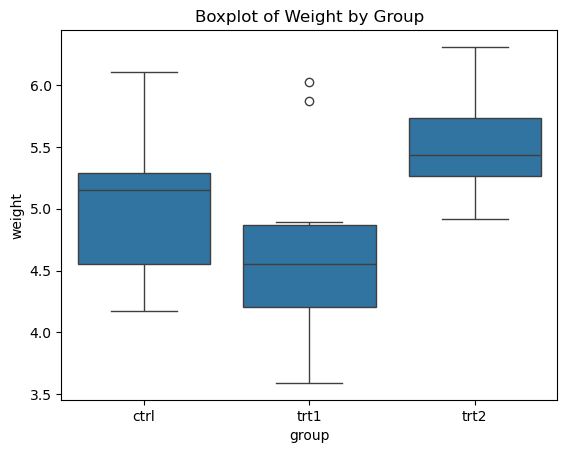

In [34]:
# Boxplot to visualize distributions
sns.boxplot(x='group', y='weight', data=df)
plt.title('Boxplot of Weight by Group')
plt.show()

_The boxplot indicates that the control group (ctrl) and Treatment 1 (trt1) have similar weight distributions, while Treatment 2 (trt2) appears to have a higher median weight, with less variability compared to the others._


##### **3.3 Assumption of Normal Distribution**: 
The data for each group should be normally distributed.
We can check normality using the Shapiro-Wilk test and histograms for each group and plot histograms to visualize the distributions.


Normality Tests (Shapiro-Wilk Test):
Control - Stat: 0.957, P-value: 0.747
Treatment 1 - Stat: 0.930, P-value: 0.452
Treatment 2 - Stat: 0.941, P-value: 0.564


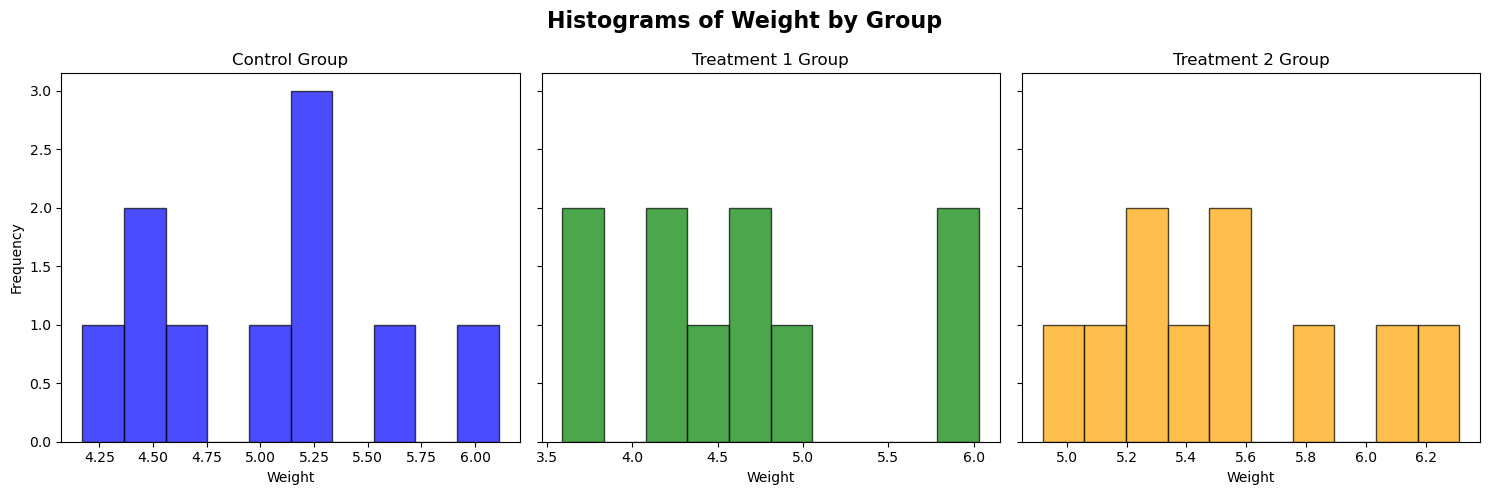

In [35]:
# Doucumentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html 
# Reference Code: https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/
# Extract group data
ctrlw = df[df['group'] == 'ctrl']['weight']
trt1w = df[df['group'] == 'trt1']['weight']
trt2w = df[df['group'] == 'trt2']['weight']

# Perform Shapiro-Wilk test
shapctrl, pshapctrl = stats.shapiro(ctrlw)
shaptrt1, pshaptrt1 = stats.shapiro(trt1w)
shaptrt2, pshaptrt2 = stats.shapiro(trt2w)

# Display results
print("Normality Tests (Shapiro-Wilk Test):")
print(f"Control - Stat: {shapctrl:.3f}, P-value: {pshapctrl:.3f}")
print(f"Treatment 1 - Stat: {shaptrt1:.3f}, P-value: {pshaptrt1:.3f}")
print(f"Treatment 2 - Stat: {shaptrt2:.3f}, P-value: {pshaptrt2:.3f}")

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axes[0].hist(ctrlw, bins=10, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Control Group')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Frequency')

axes[1].hist(trt1w, bins=10, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Treatment 1 Group')
axes[1].set_xlabel('Weight')

axes[2].hist(trt2w, bins=10, color='orange', alpha=0.7, edgecolor='black')
axes[2].set_title('Treatment 2 Group')
axes[2].set_xlabel('Weight')

plt.suptitle('Histograms of Weight by Group', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


_The histograms for the three groups (Control, Treatment 1, and Treatment 2) show roughly symmetrical distributions of weight. The Shapiro-Wilk test results indicate that all groups have p-values > 0.05, suggesting no significant deviation from normality._

A **Q-Q plot** (Quantile-Quantile plot) is also used to assess whether a dataset follows a **normal distribution**. It compares the quantiles of the dataset against the quantiles of a normal distribution. If the data points lie approximately along a straight line, the data is roughly normally distributed. Deviations from this straight line suggest departures from normality. (Source: [Arc Gis](https://desktop.arcgis.com/en/arcmap/latest/extensions/geostatistical-analyst/normal-qq-plot-and-general-qq-plot.htm#:~:text=QQ%20plot%20example-,Examining%20data%20distributions%20using%20QQ%20plots,deviate%20from%20the%20reference%20line.))

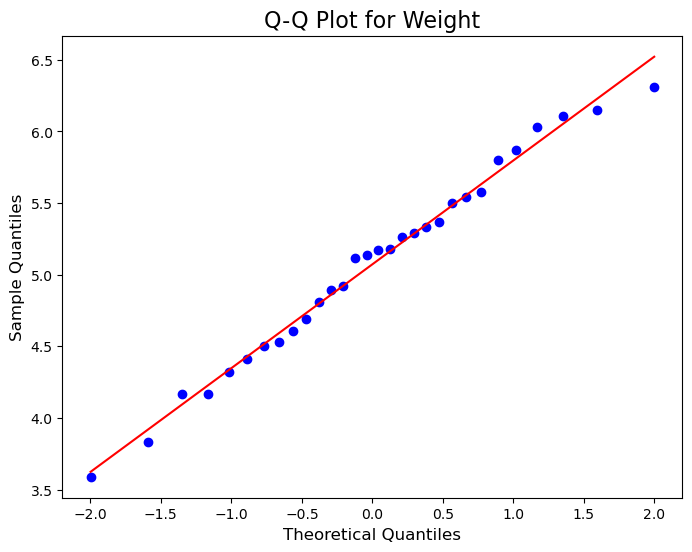

In [36]:
# Python code from: https://www.datacamp.com/tutorial/qq-plot
plt.figure(figsize=(8, 6))
stats.probplot(df['weight'], dist="norm", plot=plt)

# Title and labels
plt.title('Q-Q Plot for Weight', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)

# Show the plot
plt.show()

_How to interpret a Q-Q plot:_
_Straight line: The data follows a normal distribution._
_S-shaped curve: Indicates that the data may be skewed (left or right)._
_Curved pattern: Indicates the data has heavy tails (leptokurtic) or lighter tails (platykurtic) than a normal distribution._ 
(Source: [Data Camp](https://www.datacamp.com/tutorial/qq-plot))

##### **3.4 Assumption of Normal Distribution**: 
The variances in the two or more groups should be equal. This can be tested using Levene’s Test. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Levene%27s_test), [DataLab](https://datatab.net/tutorial/levene-test))

In [37]:
# Perform Levene's Test
lvtest, lvpval = levene(ctrlw, trt1w, trt2w)

print("\nLevene's Test for Equality of Variances:")
print(f"Stat: {lvtest:.3f}, P-value: {lvpval:.3f}")


Levene's Test for Equality of Variances:
Stat: 1.119, P-value: 0.341


_The Levene's test for equality of variances has a test statistic of 1.119. This indicates that the variances among the groups are not significantly different, satisfying the assumption of homogeneity of variances for performing a t-test._

#### **Summary of Assumptions from the Plant Growth dataset**

The Plant Growth dataset meets all the necessary assumptions for performing a t-test:

1. Continuous data is present.

2. Normal distribution is satisfied for all groups.

3. Homogeneity of variances is satisfied.

### **4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.**

Based on the assumptions that the Plant Growth dataset meets the necessary conditions for performing a t-test (continuous data, normal distribution, and homogeneity of variances), we can now proceed with an independent two-sample t-test to determine if there is a significant difference between the two treatment groups trt1 and trt2.

An **independent two-sample t-test** compares the means of the two groups and tests whether any observed difference is statistically significant.

**T-test Formula:**

As mentioned above, the formula for the independent two-sample t-test is:

$$
t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

Where:
- $\bar{x_1}$ and $\bar{x_2}$ are the sample means for groups 1 and 2.
- $s_1^2$ and $s_2^2$ are the sample variances for groups 1 and 2.
- $n_1$ and $n_2$ are the sample sizes for groups 1 and 2.

**Decision Rule:**

We set the significance level $\alpha = 0.05$. The decision rule is as follows:
- If **p-value** < $\alpha$, reject the null hypothesis ($H_0$) and conclude that there is a significant difference between the two groups.
- If **p-value** ≥ $\alpha$, fail to reject the null hypothesis, and conclude that there is no significant difference between the two groups.

**Interpretation of Results:**

- **T-statistic**: The value indicating how much the sample means differ, standardized by the variability within each group.
- **P-value**: The probability of obtaining a result at least as extreme as the observed result if the null hypothesis were true.

If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference between the means of the two treatment groups.

In [38]:
# Perform an independent two-sample t-test assuming equal variances (pooled variance)
t_statistic, p_value = stats.ttest_ind(trt1w, trt2w, equal_var=True)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that trt1 and trt2 means are not equal.")
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that trt1 and trt2 means are equal.")


T-statistic: -3.0100985421243616
P-value: 0.0075184261182198574
Null Hypothesis is rejected. There is evidence to conclude that trt1 and trt2 means are not equal.


### **5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.**

**ANOVA** (Analysis of Variance) is a statistical method used to compare the means of three or more groups to determine if there is a significant difference between them. Different types of ANOVA include One-Way ANOVA, Two-Way ANOVA, Factorial ANOVA, and Repeated Measures ANOVA. 

As described by Timpany (2016), **One-Way ANOVA** is applied when there is a single independent variable with three or more groups. In our case, we are comparing three groups: "ctrl" (control), "trt1" (treatment 1), and "trt2" (treatment 2). ((Source:)[https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/anova/] )

### Types of ANOVA
- **One-Way ANOVA**: Compares means across three or more groups based on one independent variable.
- **Two-Way ANOVA**: Considers the effect of two independent variables and their interaction.
- **Factorial ANOVA**: Evaluates the influence of multiple independent variables with varying levels.
- **Repeated Measures ANOVA**: Used when the same subjects are measured under different conditions or over time.

((Source:)[https://www.statisticssolutions.com/the-various-forms-of-anova/])

We will use `scipy.stats.f_oneway` to perform the ANOVA test.



In [39]:
# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(ctrlw, trt1w, trt2w)

# Display the results
print("One-Way ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: Significant differences exist among the groups.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference among the groups.")


One-Way ANOVA Results:
F-Statistic: 4.846087862380136
P-Value: 0.0159099583256229
Reject the Null Hypothesis: Significant differences exist among the groups.


### Understanding Alpha (α) in ANOVA

In ANOVA, **alpha (α)** is the significance level that represents the probability of making a **Type I error**—rejecting a true null hypothesis. It is a threshold set before the analysis to evaluate the p-value.

Commonly used values for α are:
- **0.05**: 5% risk of Type I error (standard in most studies).
- **0.01**: 1% risk (used for stricter testing).

### Why α is Important:
1. **Controls Type I Errors**: Limits the risk of falsely identifying differences among group means.
2. **Balances Error Types**: Lower α reduces false positives but increases the risk of false negatives (Type II error).

For example:
- If **α = 0.05**, there is a 5% risk of concluding group means differ when they do not.

((Source:)[https://www.statsdirect.com/help/basics/p_values.htm])


### **6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.**

**Comparing t-Test and ANOVA**
When comparing two groups, a **t-test** and **F-test** provide similar results. However, for more than two groups, **ANOVA** becomes a more practical method.  

**Advantages of ANOVA:**
- **Simplicity**: Provides a single-step test for comparing all group means.  
- **Efficiency**: Eliminates the need for multiple pairwise comparisons, reducing confusion and mistakes.  
- **Scalability**: Handles a large number of groups (\(k\)) without overwhelming calculations or interpretation errors.  

#### Type I Error and ANOVA
Each pairwise t-test carries a risk of **Type I error** (false positive). As the number of comparisons increases, this risk accumulates. For example:  
- For \(k=10\), performing 45 t-tests at \(\alpha=0.05\) leads to a high cumulative Type I error rate.  
- ANOVA limits this risk to the pre-set \(\alpha\), regardless of the number of groups.

#### Bonferroni Correction
When testing multiple hypotheses, the **Bonferroni correction** adjusts \(\alpha\) by dividing it by the number of comparisons.  
- Reduces Type I errors but increases **Type II errors** (false negatives).  
- ANOVA mitigates this by maintaining balance between the error types.

#### Variance Decomposition in ANOVA
ANOVA separates variability into:  
- **Within-Group Variance**: Random noise (Mean Square Within).  
- **Between-Group Variance**: Differences in group means.  

##### F-Statistic
The F-statistic is the ratio of between-group variance to within-group variance. A larger ratio suggests significant differences between groups.  

#### Statistical Power and Post Hoc Analysis
- **Higher Statistical Power**: Pooled variance in ANOVA provides better precision and reduces the influence of outliers.
- **Post Hoc Tests**: After a significant ANOVA result, post hoc tests like **Tukey's HSD** or **SNK** identify specific group differences.  

#### Example Post Hoc Tests:
- **Tukey's HSD**: Compares all pairwise group means while controlling family-wise error rates.  
- **Student–Newman–Keuls (SNK)**: Stepwise pairwise comparisons, ordered by group means.

(Source:)[https://pmc.ncbi.nlm.nih.gov/articles/PMC6813708/]


Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


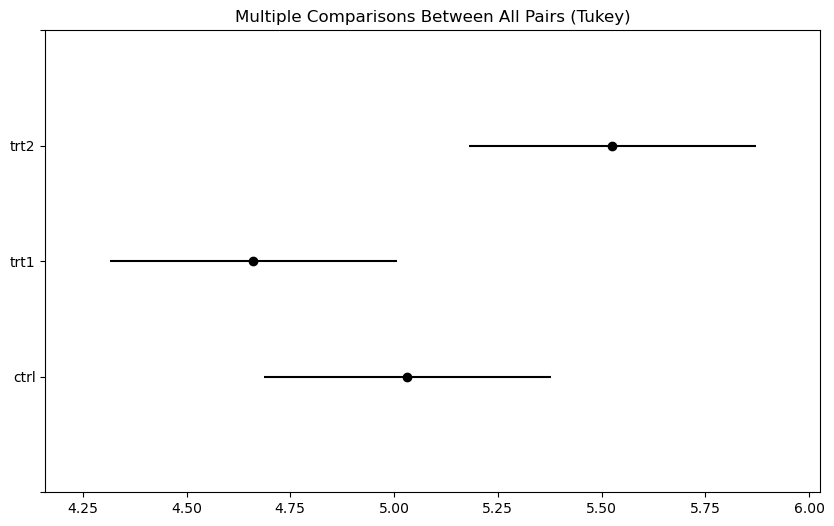

In [40]:
#Turkey's HSD Test
# Reference code: https://www.statology.org/tukey-test-python/
# Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
weights = df['weight']
groups = df['group']

tukey = pairwise_tukeyhsd(endog=weights, groups=groups, alpha=0.05)
print("\nTukey's HSD Results:")
print(tukey)

# Plot Tukey's HSD results
tukey.plot_simultaneous()
plt.show()

**Interpretation of Tukey's HSD Plot:**
   - `trt2` is significantly different from both `trt1` and `ctrl`.
   - `trt1` and `ctrl` do not differ significantly.


In [41]:
# Reference code: https://stackoverflow.com/questions/773/how-do-i-use-itertools-groupby , https://stackoverflow.com/questions/32728899/python-itertools-groupby-for-unique-key-value-pairs , https://docs.python.org/3/library/itertools.html
import numpy as np
import pandas as pd
import scipy.stats as stats

# Define the SNK test function
def snk_test(data, group_col, value_col, alpha=0.05):
    # Group the data and compute means and sample sizes
    groups = data.groupby(group_col)
    group_means = groups[value_col].mean()
    group_sizes = groups[value_col].size()
    
    # Sort groups by their means
    group_means = group_means.sort_values()
    group_order = group_means.index
    group_sizes = group_sizes[group_order]
    
    # ANOVA calculations for Mean Squared Error (MSE)
    group_variances = groups[value_col].var()
    mse = sum((group_sizes - 1) * group_variances) / (len(data) - len(group_means))
    n_groups = len(group_means)
    
    # Prepare the results DataFrame
    results = []

    # Pairwise comparisons in stepwise fashion
    for step in range(n_groups, 1, -1):
        # Get all pairs of groups for this step
        for i in range(n_groups - step + 1):
            start_group = group_order[i]
            end_group = group_order[i + step - 1]
            
            # Compute the mean difference and critical value
            mean_diff = abs(group_means[end_group] - group_means[start_group])
            critical_value = stats.t.ppf(1 - alpha / 2, df=(len(data) - n_groups)) \
                * np.sqrt(mse * (1 / group_sizes[start_group] + 1 / group_sizes[end_group]))
            
            # Add the comparison result
            results.append({
                "Group 1": start_group,
                "Group 2": end_group,
                "Mean Diff": mean_diff,
                "Critical Value": critical_value,
                "Significant": mean_diff > critical_value
            })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Perform SNK test
snk_results = snk_test(df, group_col="group", value_col="weight", alpha=0.05)

# Print results
print("\nStudent-Newman-Keuls (SNK) Test Results:")
print(snk_results)



Student-Newman-Keuls (SNK) Test Results:
  Group 1 Group 2  Mean Diff  Critical Value  Significant
0    trt1    trt2      0.865        0.572013         True
1    trt1    ctrl      0.371        0.572013        False
2    ctrl    trt2      0.494        0.572013        False


The **Student-Newman-Keuls (SNK)** test results indicate that there is a **statistically significant difference** between **trt1** and **trt2** (mean difference = 0.865, p < 0.05), while there is **no significant difference** between **trt1** and **ctrl** (mean difference = 0.371, p > 0.05) and between **ctrl** and **trt2** (mean difference = 0.494, p > 0.05). This suggests that while **trt1** and **trt2** differ significantly, both treatments do not differ significantly from the control group.


## Conclusion

In this notebook, we analyzed the `PlantGrowth` dataset, exploring the differences in weights across control and treatment groups. The data visualization through box plots, histograms, and Q-Q plots revealed symmetrical distributions and no evidence against normality, as confirmed by the Shapiro-Wilk test. Levene's test validated equal variances among the groups.

### Key Statistical Results:

1. **One-Way ANOVA:**  
   - F-Statistic: 4.846  
   - P-Value: 0.0159  
   - **Conclusion:** Significant mean differences exist among `ctrl`, `trt1`, and `trt2`.

2. **Tukey's HSD Test:**  
   - `trt2` differs significantly from both `trt1` and `ctrl`.  
   - No significant difference was found between `trt1` and `ctrl`.

3. **Student-Newman-Keuls Test (SNK):**  
   - `trt1` and `trt2` showed a statistically significant mean difference.  
   - No significant difference was observed between `trt1` and `ctrl`, as well as between `ctrl` and `trt2`.

### Insights:
- The treatment effects suggest potential differences in intervention outcomes, particularly between `trt1` and `trt2`, while the control group is more similar to `trt1`.  
- ANOVA was a robust and efficient method for identifying mean differences across multiple groups, avoiding the inflated error rates associated with repeated t-tests.

In summary, this analysis underscores the importance of visualizations, proper statistical tests, and critical interpretation in making data-driven decisions.

### Bibliography

1. "T-Tests Overview." *Statistics How To.* Available at [https://www.statisticshowto.com/probability-and-statistics/t-test/](https://www.statisticshowto.com/probability-and-statistics/t-test/)

2. "T-Distribution and T-Test." *Investopedia.* Available at [https://www.investopedia.com/terms/t/t-distribution.asp](https://www.investopedia.com/terms/t/t-distribution.asp)

3. "t-test: scipy.stats.ttest_ind." *SciPy Documentation.* Retrieved from [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

4. "Assumptions of a t-test." *Simply Psychology.* Available at [https://www.simplypsychology.org/t-test.html](https://www.simplypsychology.org/t-test.html)

5. VanderPlas, J. (2016). *Python Data Science Handbook.* O'Reilly Media. Available at [https://jakevdp.github.io/PythonDataScienceHandbook/](https://jakevdp.github.io/PythonDataScienceHandbook/)

6. Thevapalan, S. (2024). "T-Test Explained." *The Research Journal.*

7. "Hypothesis Testing." *Wikipedia.* Available at [https://en.wikipedia.org/wiki/Statistical_hypothesis_test](https://en.wikipedia.org/wiki/Statistical_hypothesis_test)

8. "T-test Tutorial." *GraphPad Software.* Retrieved from [https://www.graphpad.com/quickcalcs/](https://www.graphpad.com/quickcalcs/)

9. "Independent Two-Sample T-test Discussion." *Quora.* Available at [https://www.quora.com/What-distinguishes-between-the-single-sample-t-test-and-the-independent-samplest-test-in-terms-of-the-comparison-distribution](https://www.quora.com/What-distinguishes-between-the-single-sample-t-test-and-the-independent-samplest-test-in-terms-of-the-comparison-distribution)

10. "How to Perform a Shapiro-Wilk Test in Python." *GeeksforGeeks.* Available at [https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/](https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/)

11. "Shapiro Test Documentation." *SciPy Documentation.* Available at [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

12. "Normal QQ Plot and General QQ Plot." *ArcGIS Desktop.* Retrieved from [https://desktop.arcgis.com/en/arcmap/latest/extensions/geostatistical-analyst/normal-qq-plot-and-general-qq-plot.htm#:~:text=QQ%20plot%20example-,Examining%20data%20distributions%20using%20QQ%20plots,deviate%20from%20the%20reference%20line](https://desktop.arcgis.com/en/arcmap/latest/extensions/geostatistical-analyst/normal-qq-plot-and-general-qq-plot.htm#:~:text=QQ%20plot%20example-,Examining%20data%20distributions%20using%20QQ%20plots,deviate%20from%20the%20reference%20line)

13. "QQ Plot." *DataCamp.* Available at [https://www.datacamp.com/tutorial/qq-plot](https://www.datacamp.com/tutorial/qq-plot)

14. "Pooled Variance." *Wikipedia.* Available at [https://en.wikipedia.org/wiki/Pooled_variance](https://en.wikipedia.org/wiki/Pooled_variance)

15. "ANOVA." *Danstich.* Available at [https://danstich.github.io/worst-r/7.1-anova.html](https://danstich.github.io/worst-r/7.1-anova.html)

16. "ANOVA Definition." *Statistics Solutions.* Available at [https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/anova/](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/anova/)

17. "ANOVA vs. T-Test: A Comparison." *Voxco.* Available at [https://www.voxco.com/blog/anova-vs-t-test-with-a-comparison-chart/#:~:text=The%20t%2Dtest%20is%20conducted,go%20for%20the%20ANOVA%20test](https://www.voxco.com/blog/anova-vs-t-test-with-a-comparison-chart/#:~:text=The%20t%2Dtest%20is%20conducted,go%20for%20the%20ANOVA%20test)

18. "ANOVA vs. T-tests." *Laerd Statistics.* Available at [https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php)

19. "Newman–Keuls Method." *Wikipedia.* Retrieved from [https://en.wikipedia.org/wiki/Newman%E2%80%93Keuls_method](https://en.wikipedia.org/wiki/Newman%E2%80%93Keuls_method)

20. "Tukey Test." *Wikipedia.* Retrieved from [https://en.wikipedia.org/wiki/Tukey%27s_range_test#:~:text=Tukey's%20test%20compares%20the%20means,than%20the%20expected%20standard%20error](https://en.wikipedia.org/wiki/Tukey%27s_range_test#:~:text=Tukey's%20test%20compares%20the%20means,than%20the%20expected%20standard%20error)

21. "Tukey's HSD Test Documentation." *SciPy Documentation.* Retrieved from [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html)
